🔹 Hotel Booking Analysis using python

🔹Import Required Libraries

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

🔹Load the Dataset

In [14]:
df= pd.read_csv('hotel_bookings 2.csv')


In [15]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [16]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


🔹 Dataset Overview

In [36]:
df.shape

(119390, 30)

In [35]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [29]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [75]:


df['reservation_status_date'] = pd.to_datetime(
    df['reservation_status_date'],
    dayfirst=True
)


In [30]:
df.describe(include ='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [31]:
for col in df.describe(include ='object').columns:
    print(col)
    print(df[col].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [32]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [38]:
df.drop(columns=['company','agent'], inplace=True, errors='ignore')


In [39]:
df.isnull().sum()


hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [40]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798,NaN


🔹  Visualization & Analysis

<Axes: >

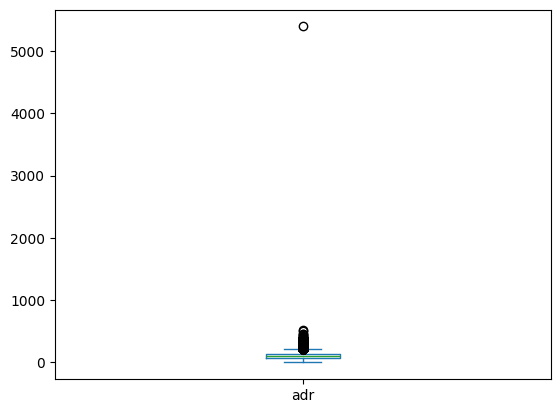

In [41]:
df['adr'].plot(kind = 'box')

### Insight:
- ADR values show a wide spread with several outliers.
- This indicates significant variation in room pricing.
- Higher-priced bookings may be more prone to cancellations.


In [78]:
df=df[df['adr']<5000]

is_canceled
0    0.629589
1    0.370411
Name: proportion, dtype: float64


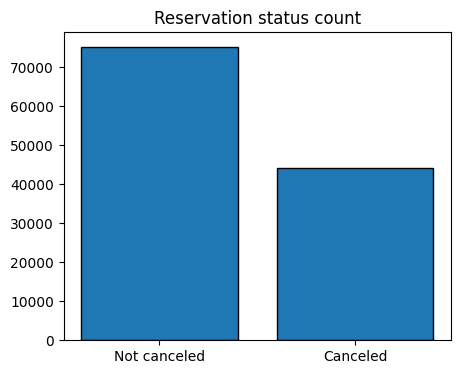

In [79]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)
plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled','Canceled'], df['is_canceled'].value_counts(),edgecolor='k')
plt.show()

### Insight:
- A significant portion of hotel reservations get canceled.
- This indicates that cancellations are a major challenge for hotel operations.
- Understanding cancellation behavior is essential to improve booking confirmation and revenue stability.

### Business interpretation:
- Hotels can reduce cancellations by improving pricing strategies and cancellation policies.





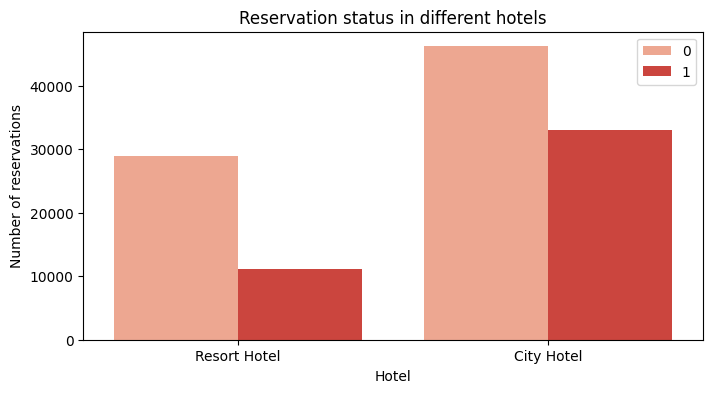

In [50]:
plt.figure(figsize=(8, 4))

ax1 = sns.countplot(
    x='hotel',
    hue='is_canceled',
    data=df,
    palette='Reds'
)

ax1.legend(bbox_to_anchor=(1, 1))
plt.title('Reservation status in different hotels', size=12)
plt.xlabel('Hotel')
plt.ylabel('Number of reservations')

plt.show()

### Insight:
- City hotels experience a higher number of canceled reservations compared to resort hotels.
- Resort hotels show a relatively higher proportion of confirmed bookings.
- This suggests that booking behavior differs by hotel type, with city hotels being more prone to cancellations.

### Business Interpretation:
- City hotels may receive more short-term or business-related bookings, leading to higher cancellation rates.
- Resort hotels likely attract leisure travelers who plan stays in advance, resulting in fewer cancellations.



In [51]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.722366
1    0.277634
Name: proportion, dtype: float64

In [52]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.582738
1    0.417262
Name: proportion, dtype: float64

In [80]:
resort_hotel=resort_hotel= resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel= resort_hotel.groupby('reservation_status_date')[['adr']].mean()



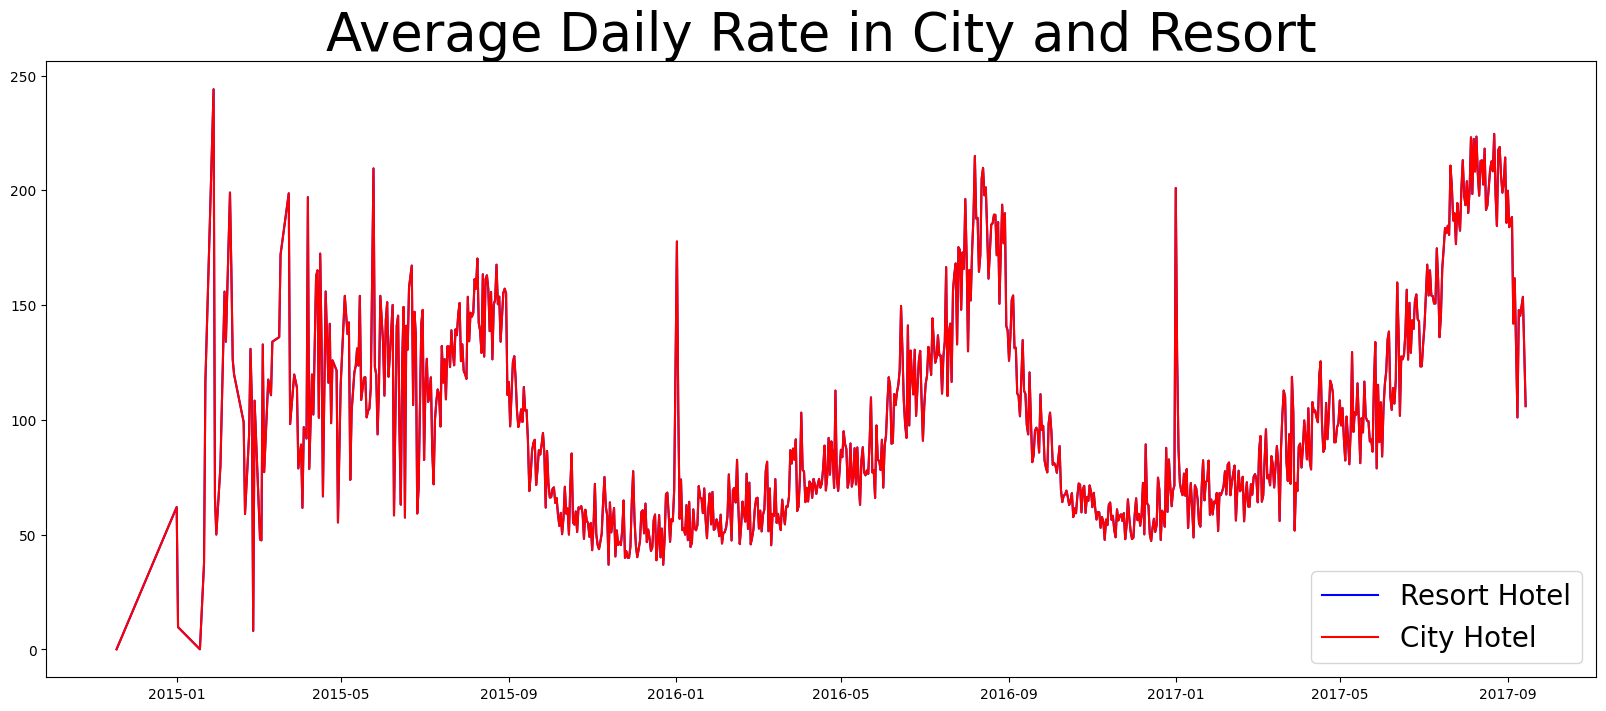

In [58]:
plt.figure(figsize=(20, 8))
plt.title('Average Daily Rate in City and Resort', fontsize=38)

plt.plot(
    resort_hotel.index,
    resort_hotel['adr'],
    label='Resort Hotel',
    color='blue'
)

plt.plot(
    city_hotel.index,
    city_hotel['adr'],
    label='City Hotel',
    color='red'
)

plt.legend(fontsize=20)
plt.show()


### Insight:
- City hotel ADR shows higher fluctuation compared to resort hotels.
- Resort hotel ADR remains relatively more stable over time.
- This indicates that city hotel pricing is more dynamic and demand-driven.

### Business Interpretation:
- Frequent price changes in city hotels may influence customer booking and cancellation behavior.
- Stable pricing in resort hotels can contribute to lower cancellation rates.



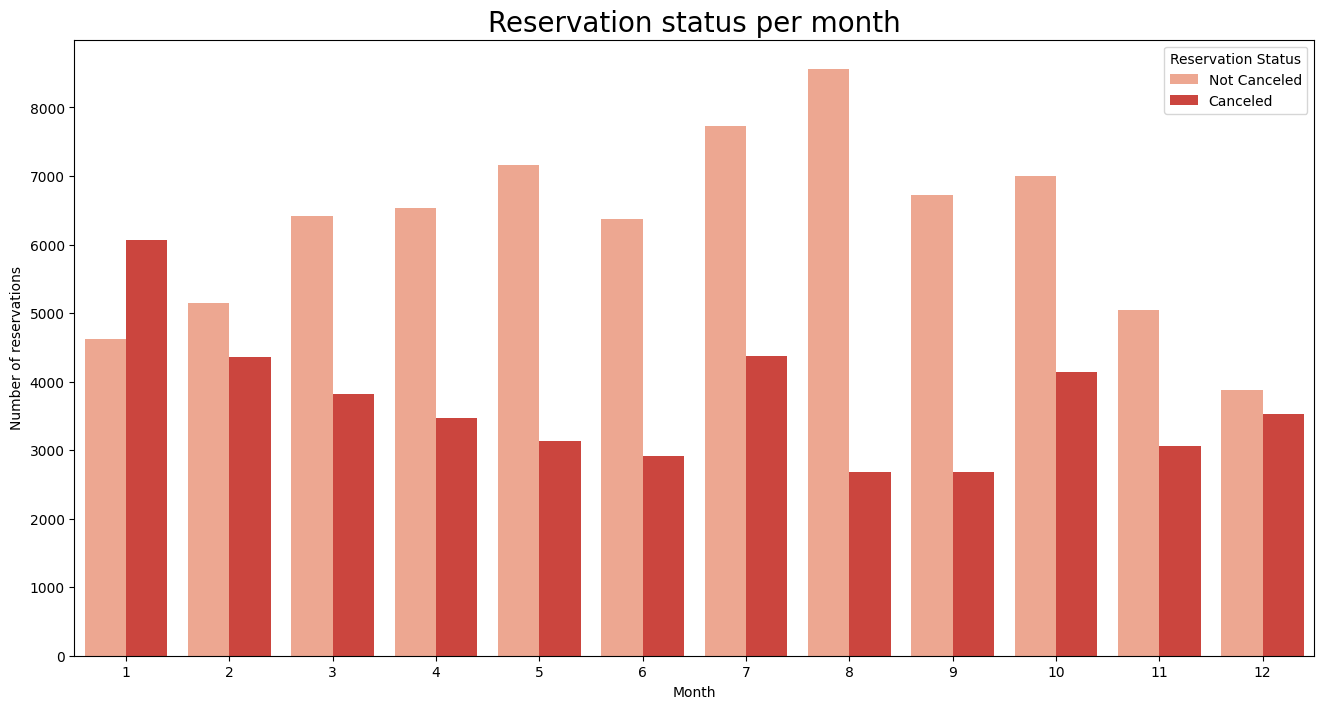

In [61]:
df['month'] = df['reservation_status_date'].dt.month

plt.figure(figsize=(16, 8))

ax1 = sns.countplot(
    x='month',
    hue='is_canceled',
    data=df,
    palette='Reds'
)

ax1.legend(
    title='Reservation Status',
    labels=['Not Canceled', 'Canceled'],
    bbox_to_anchor=(1, 1)
)

plt.title('Reservation status per month', size=20)
plt.xlabel('Month')
plt.ylabel('Number of reservations')

plt.show()

### Insight:
- Reservation cancellations vary across different months.
- Certain months show a noticeably higher number of canceled bookings.
- This indicates that seasonality plays an important role in booking and cancellation behavior.

### Business Interpretation:
- Hotels can identify high-risk months and apply stricter cancellation policies.
- Dynamic pricing and promotional strategies can be planned based on seasonal demand.



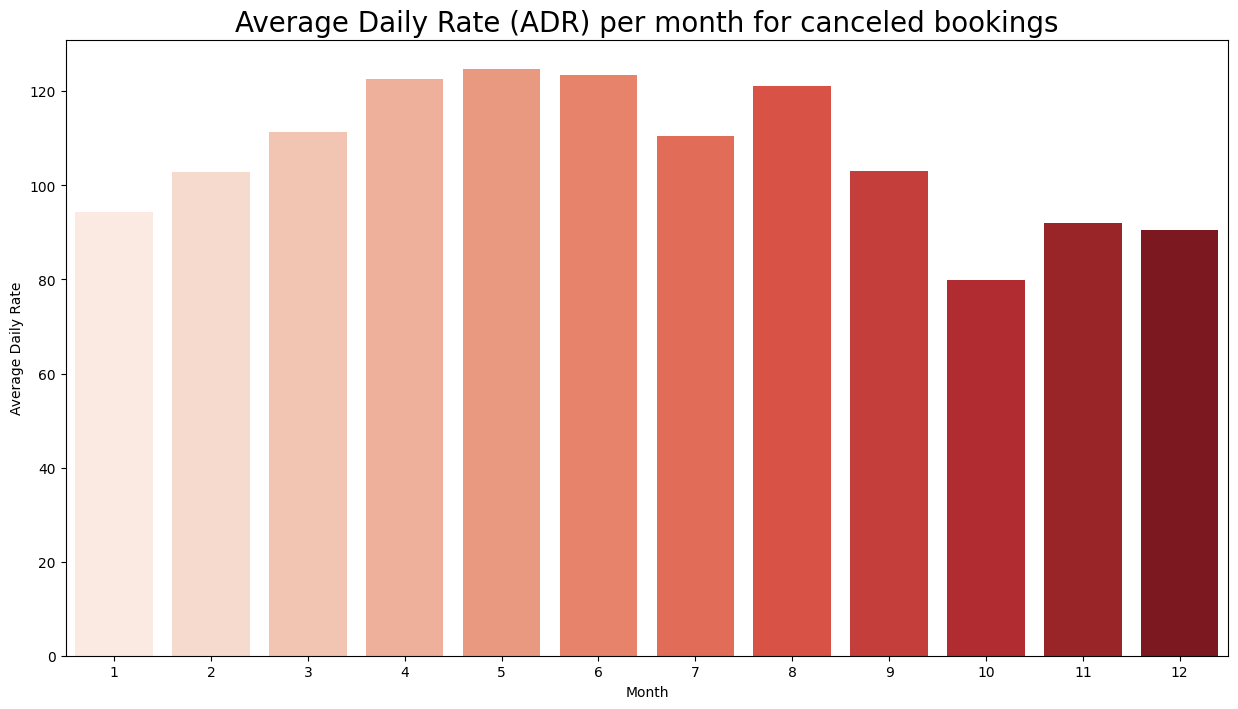

In [63]:
plt.figure(figsize=(15, 8))
plt.title('Average Daily Rate (ADR) per month for canceled bookings', fontsize=20)

sns.barplot(
    x='month',
    y='adr',
    data=df[df['is_canceled'] == 1]
         .groupby('month', as_index=False)['adr']
         .mean(),
    palette='Reds'
)

plt.xlabel('Month')
plt.ylabel('Average Daily Rate')

plt.show()


### Insight:
- Months with higher ADR also show higher cancellation values.
- Customers may cancel bookings when prices are perceived as high.
- Dynamic pricing strategies could reduce cancellations.

### Business Interpretation:
- Hotels can introduce flexible pricing or discounts during high-ADR months.
- Optimizing pricing strategies may help reduce cancellation rates.



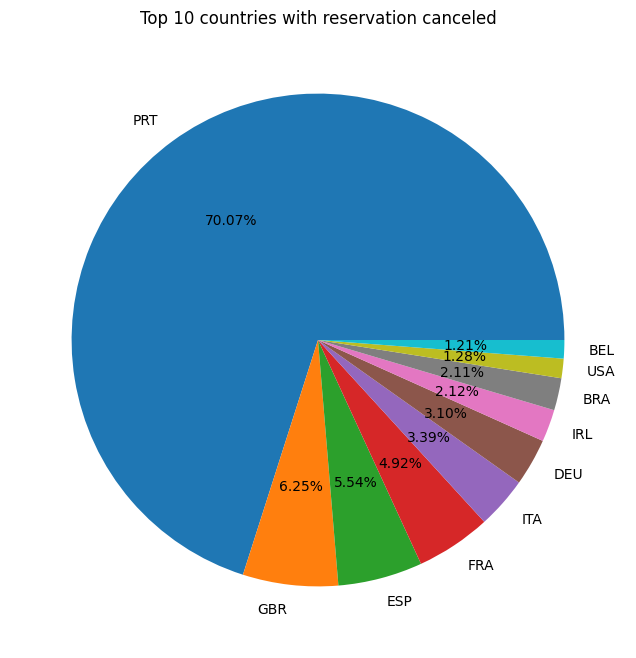

In [65]:
cancelled_data = df[df['is_canceled'] == 1]

top_10_country = cancelled_data['country'].value_counts()[:10]

plt.figure(figsize=(8, 8))
plt.title('Top 10 countries with reservation canceled')

plt.pie(
    top_10_country,
    autopct='%.2f%%',
    labels=top_10_country.index
)
plt.show()


### Insight:
- A small number of countries contribute to a large proportion of reservation cancellations.
- This indicates that cancellation behavior varies by customer location.
- Certain regions show higher cancellation tendencies compared to others.

### Business Interpretation:
- Hotels can design region-specific booking and cancellation policies.
- Targeted communication or confirmation strategies can be applied for high-cancellation regions.



In [66]:
df['market_segment'].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24218
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [67]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.473050
Offline TA/TO    0.202850
Groups           0.165937
Direct           0.105588
Corporate        0.044351
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: proportion, dtype: float64

In [68]:
cancelled_data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.468964
Groups           0.273545
Offline TA/TO    0.187911
Direct           0.043733
Corporate        0.022432
Complementary    0.002193
Aviation         0.001176
Undefined        0.000045
Name: proportion, dtype: float64

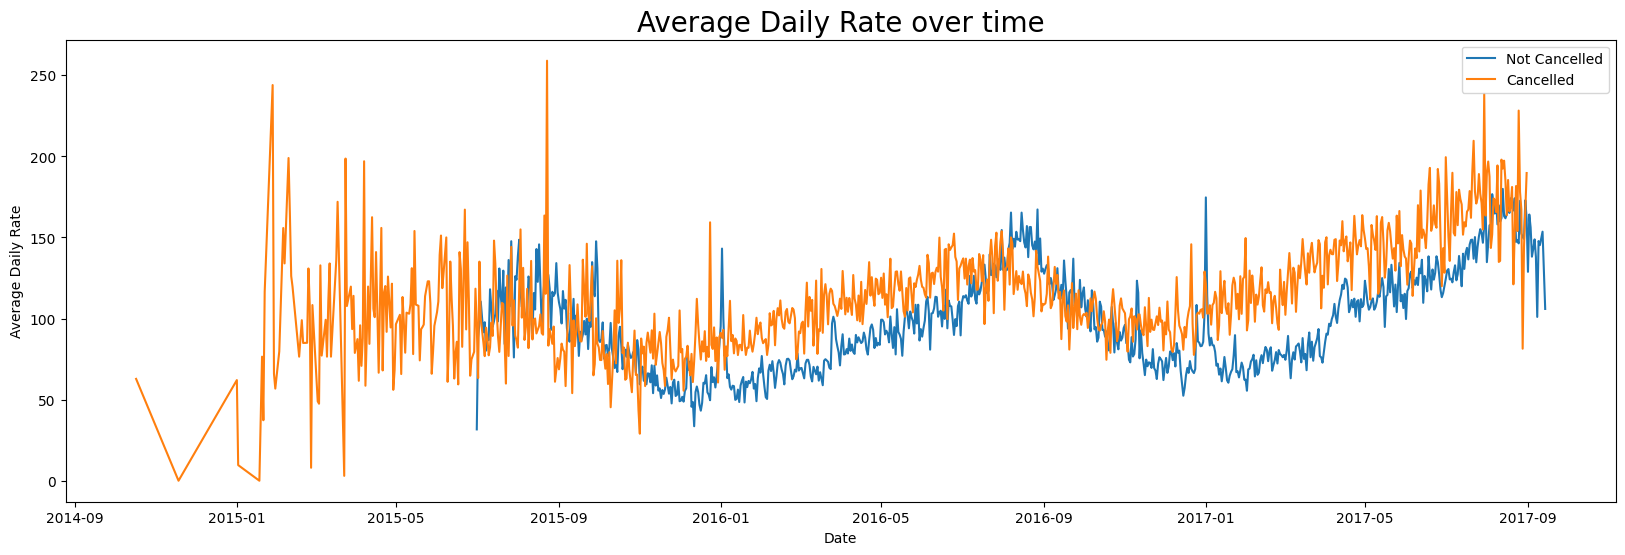

In [70]:
# Cancelled bookings
cancelled_data = df[df['is_canceled'] == 1]
cancelled_df_adr = cancelled_data.groupby(
    'reservation_status_date', as_index=False
)['adr'].mean()

cancelled_df_adr.sort_values(
    'reservation_status_date', inplace=True
)

# Not cancelled bookings
not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby(
    'reservation_status_date', as_index=False
)['adr'].mean()

not_cancelled_df_adr.sort_values(
    'reservation_status_date', inplace=True
)

# Plot
plt.figure(figsize=(20, 6))
plt.title('Average Daily Rate over time', fontsize=20)

plt.plot(
    not_cancelled_df_adr['reservation_status_date'],
    not_cancelled_df_adr['adr'],
    label='Not Cancelled'
)

plt.plot(
    cancelled_df_adr['reservation_status_date'],
    cancelled_df_adr['adr'],
    label='Cancelled'
)

plt.xlabel('Date')
plt.ylabel('Average Daily Rate')
plt.legend()
plt.show()


### Insight:
- The average daily rate (ADR) shows different trends for canceled and non-canceled bookings over time.
- Canceled bookings generally have higher and more fluctuating ADR values compared to confirmed bookings.
- This indicates that price volatility is closely associated with reservation cancellations.

### Business Interpretation:
- Customers are more likely to cancel bookings when prices fluctuate or increase significantly.
- Maintaining stable pricing or offering flexible pricing strategies can help reduce cancellation rates.



In [72]:
cancelled_df_adr = cancelled_df_adr[
    (cancelled_df_adr['reservation_status_date'] > pd.to_datetime('2016-01-01')) &
    (cancelled_df_adr['reservation_status_date'] < pd.to_datetime('2017-09-01'))
]
not_cancelled_df_adr = not_cancelled_df_adr[
    (not_cancelled_df_adr['reservation_status_date'] > pd.to_datetime('2016-01-01')) &
    (not_cancelled_df_adr['reservation_status_date'] < pd.to_datetime('2017-09-01'))
]


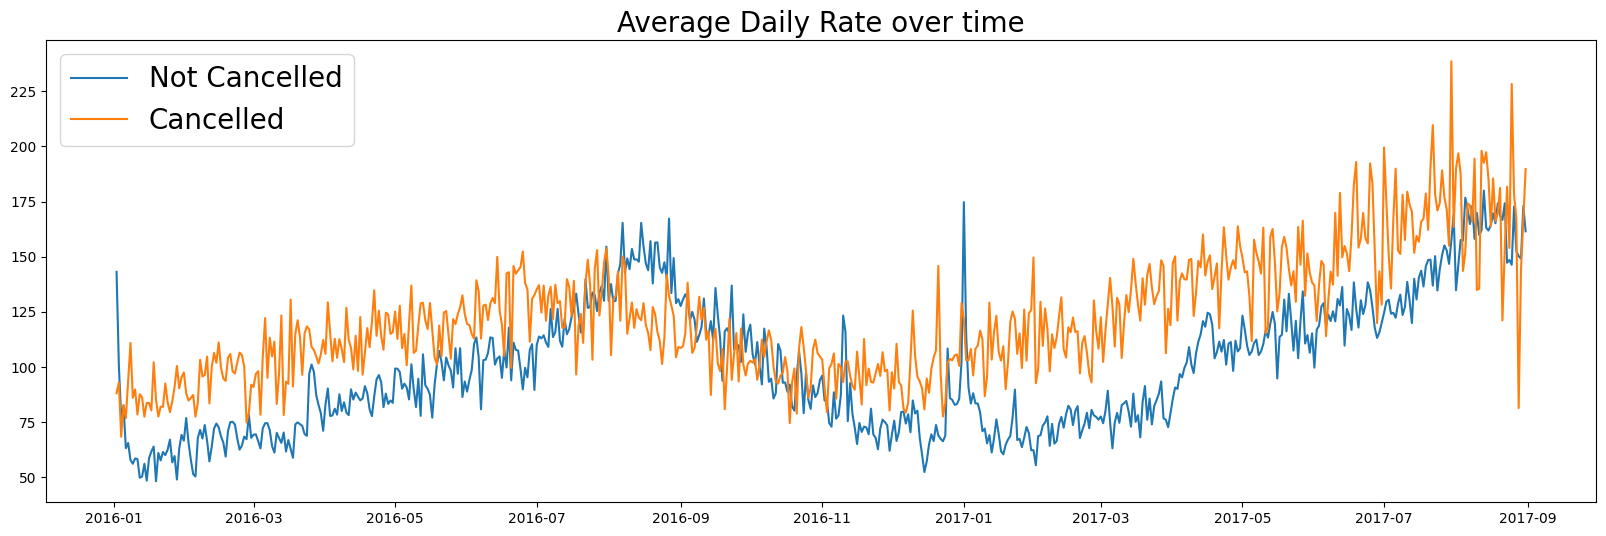

In [73]:
plt.figure(figsize=(20, 6))
plt.title('Average Daily Rate over time', fontsize=20)

plt.plot(
    not_cancelled_df_adr['reservation_status_date'],
    not_cancelled_df_adr['adr'],
    label='Not Cancelled'
)

plt.plot(
    cancelled_df_adr['reservation_status_date'],
    cancelled_df_adr['adr'],
    label='Cancelled'
)
plt.legend(fontsize=20)

### Insight:
- The average daily rate (ADR) for canceled bookings shows higher fluctuations compared to non-canceled bookings.
- Confirmed (not canceled) bookings maintain a relatively more stable ADR trend over time.
- This suggests that price instability is a key factor influencing booking cancellations.

### Business Interpretation:
- Hotels can reduce cancellations by maintaining consistent pricing strategies.
- Offering flexible pricing or early-booking discounts may encourage booking retention.



## Conclusion

The analysis highlights that cancellations are strongly influenced by pricing,
seasonality, and hotel type. By optimizing pricing strategies, identifying
high-risk periods, and applying region-specific policies, hotels can reduce
cancellations and improve overall revenue performance.
